# NBFI Vehicle loan repayment Analyze

libraries import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
import missingno as msno
from tensorflow import keras
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

data import

In [2]:
data = pd.read_csv('nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv')

C:\Users\PaleBlue\AppData\Local\Temp\ipykernel_16000\66832030.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv')


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

## missing value check

<Axes: >

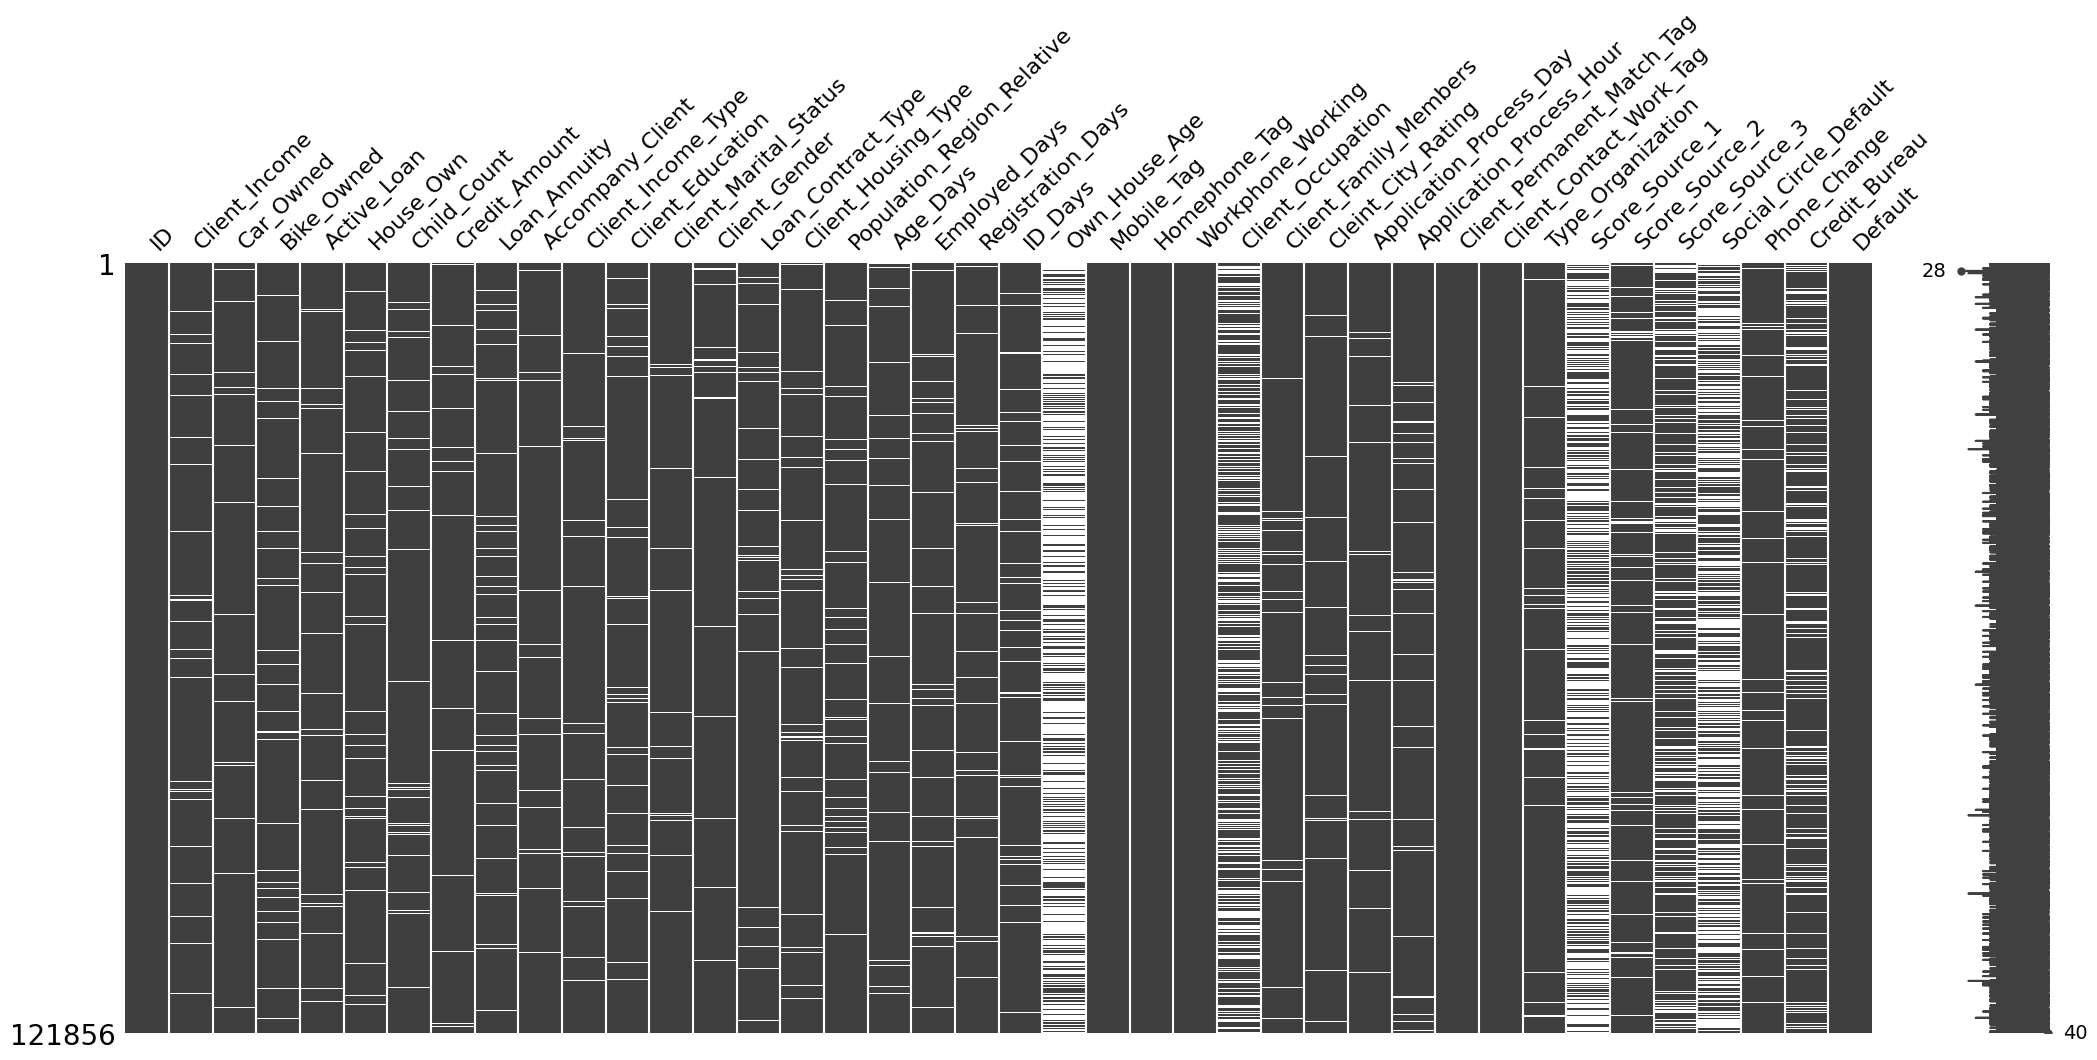

In [4]:
msno.matrix(data)

In [5]:
# 컬럼들 안의 이상 값들
na_values = ['$', '#VALUE!', '##', 'XNA', '@', '#', 'x', '&']
# float데이터 인데, object로 되어있는 이상 컬럼들
columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Score_Source_3', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days']
# csv파일 불러오는 과정 na_values안에 포함된 것들은 결측치로 대체
data = pd.read_csv('./nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv', na_values=na_values, encoding='utf-8', engine='python')


<Axes: >

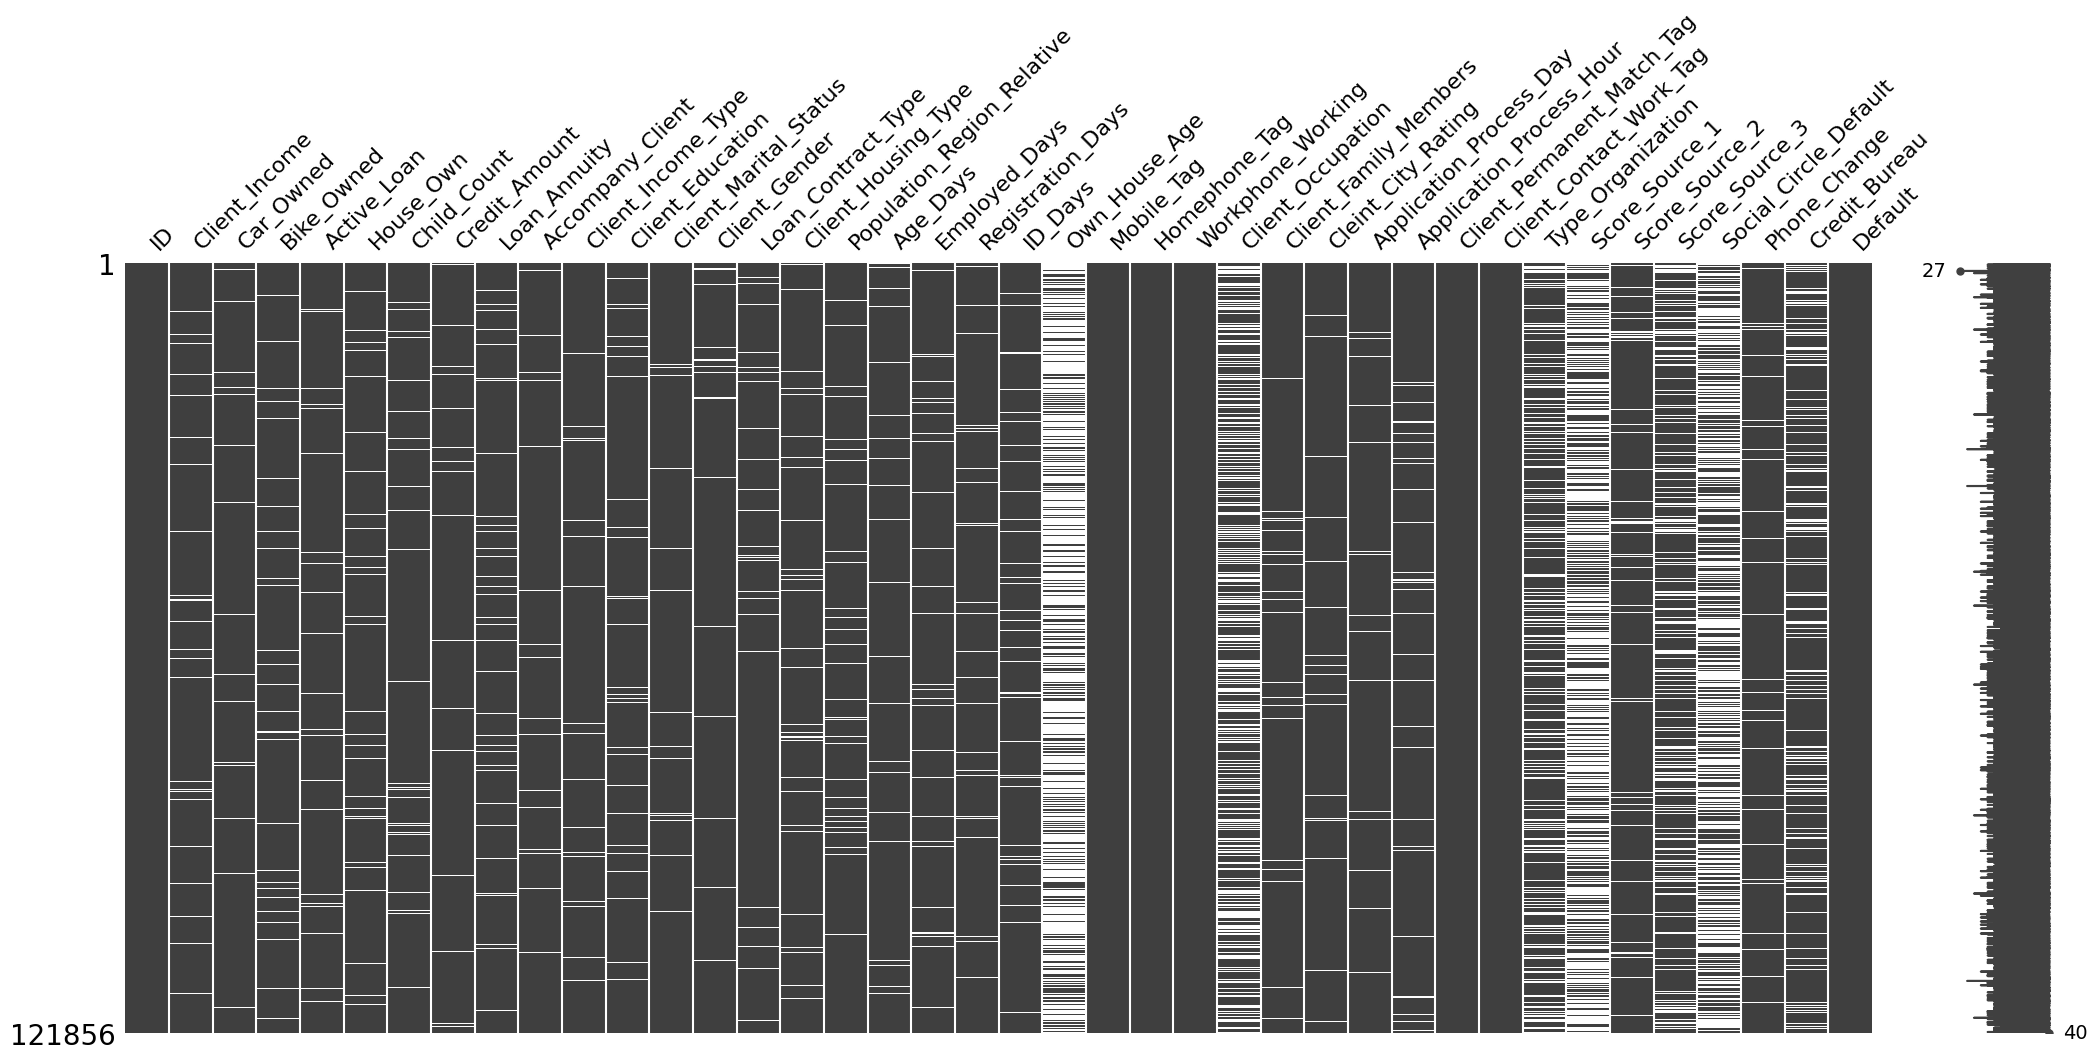

In [6]:
msno.matrix(data)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120098 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

### ID

다 고유값이므로 삭제

In [9]:
data = data.drop('ID', axis=1,)

## Client_Income

In [10]:
data.Client_Income.describe()

count    1.182340e+05
mean     1.686519e+04
std      1.153815e+04
min      2.565000e+03
25%      1.125000e+04
50%      1.440000e+04
75%      2.025000e+04
max      1.800009e+06
Name: Client_Income, dtype: float64

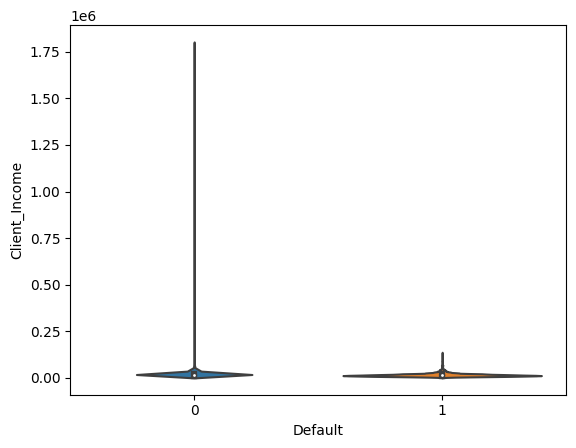

In [11]:
sns.violinplot(x="Default", y="Client_Income" , data=data,  )
plt.show()

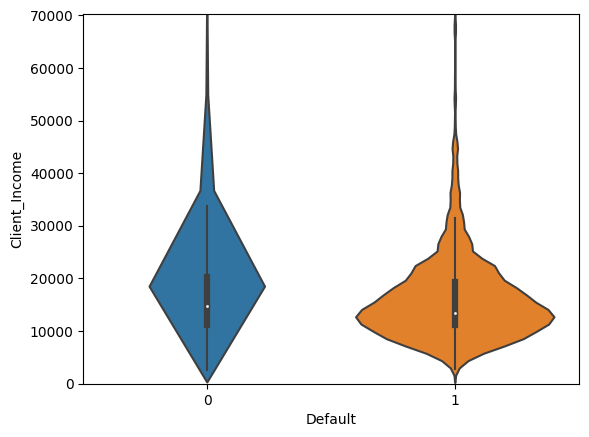

In [12]:
sns.violinplot(x="Default", y="Client_Income" , data=data,  )
plt.ylim([0,7.025000e+04])
plt.show()

In [13]:
data['log_Client_Income'] = np.log1p(data['Client_Income'])

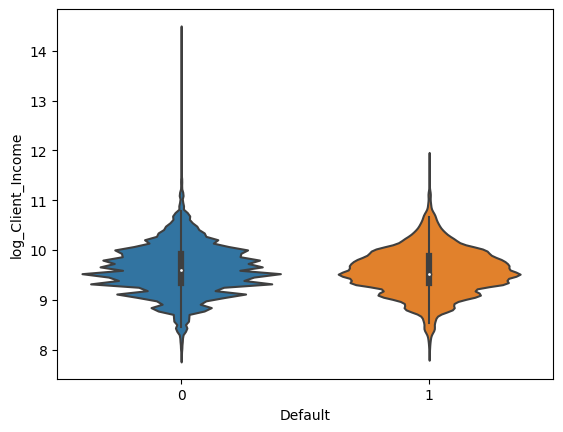

In [14]:
sns.violinplot(x="Default", y="log_Client_Income" , data=data,  )
plt.show()

In [15]:
numeri_datas_cols = [
    'Client_Income',
    'Credit_Amount',
    'Loan_Annuity',
    'Child_Count',
    'Population_Region_Relative',
    'Age_Days',
    'Employed_Days',
    'Registration_Days',
    'ID_Days',
    'Own_House_Age',
    'Client_Family_Members',
    'Score_Source_1',
    'Score_Source_2',
    'Score_Source_3',
    'Social_Circle_Default',
    'Phone_Change',
    'Credit_Bureau'
]

In [16]:
ratio_col = data.columns[data.dtypes=='float64'].to_list()

In [17]:
len(numeri_datas_cols)

17

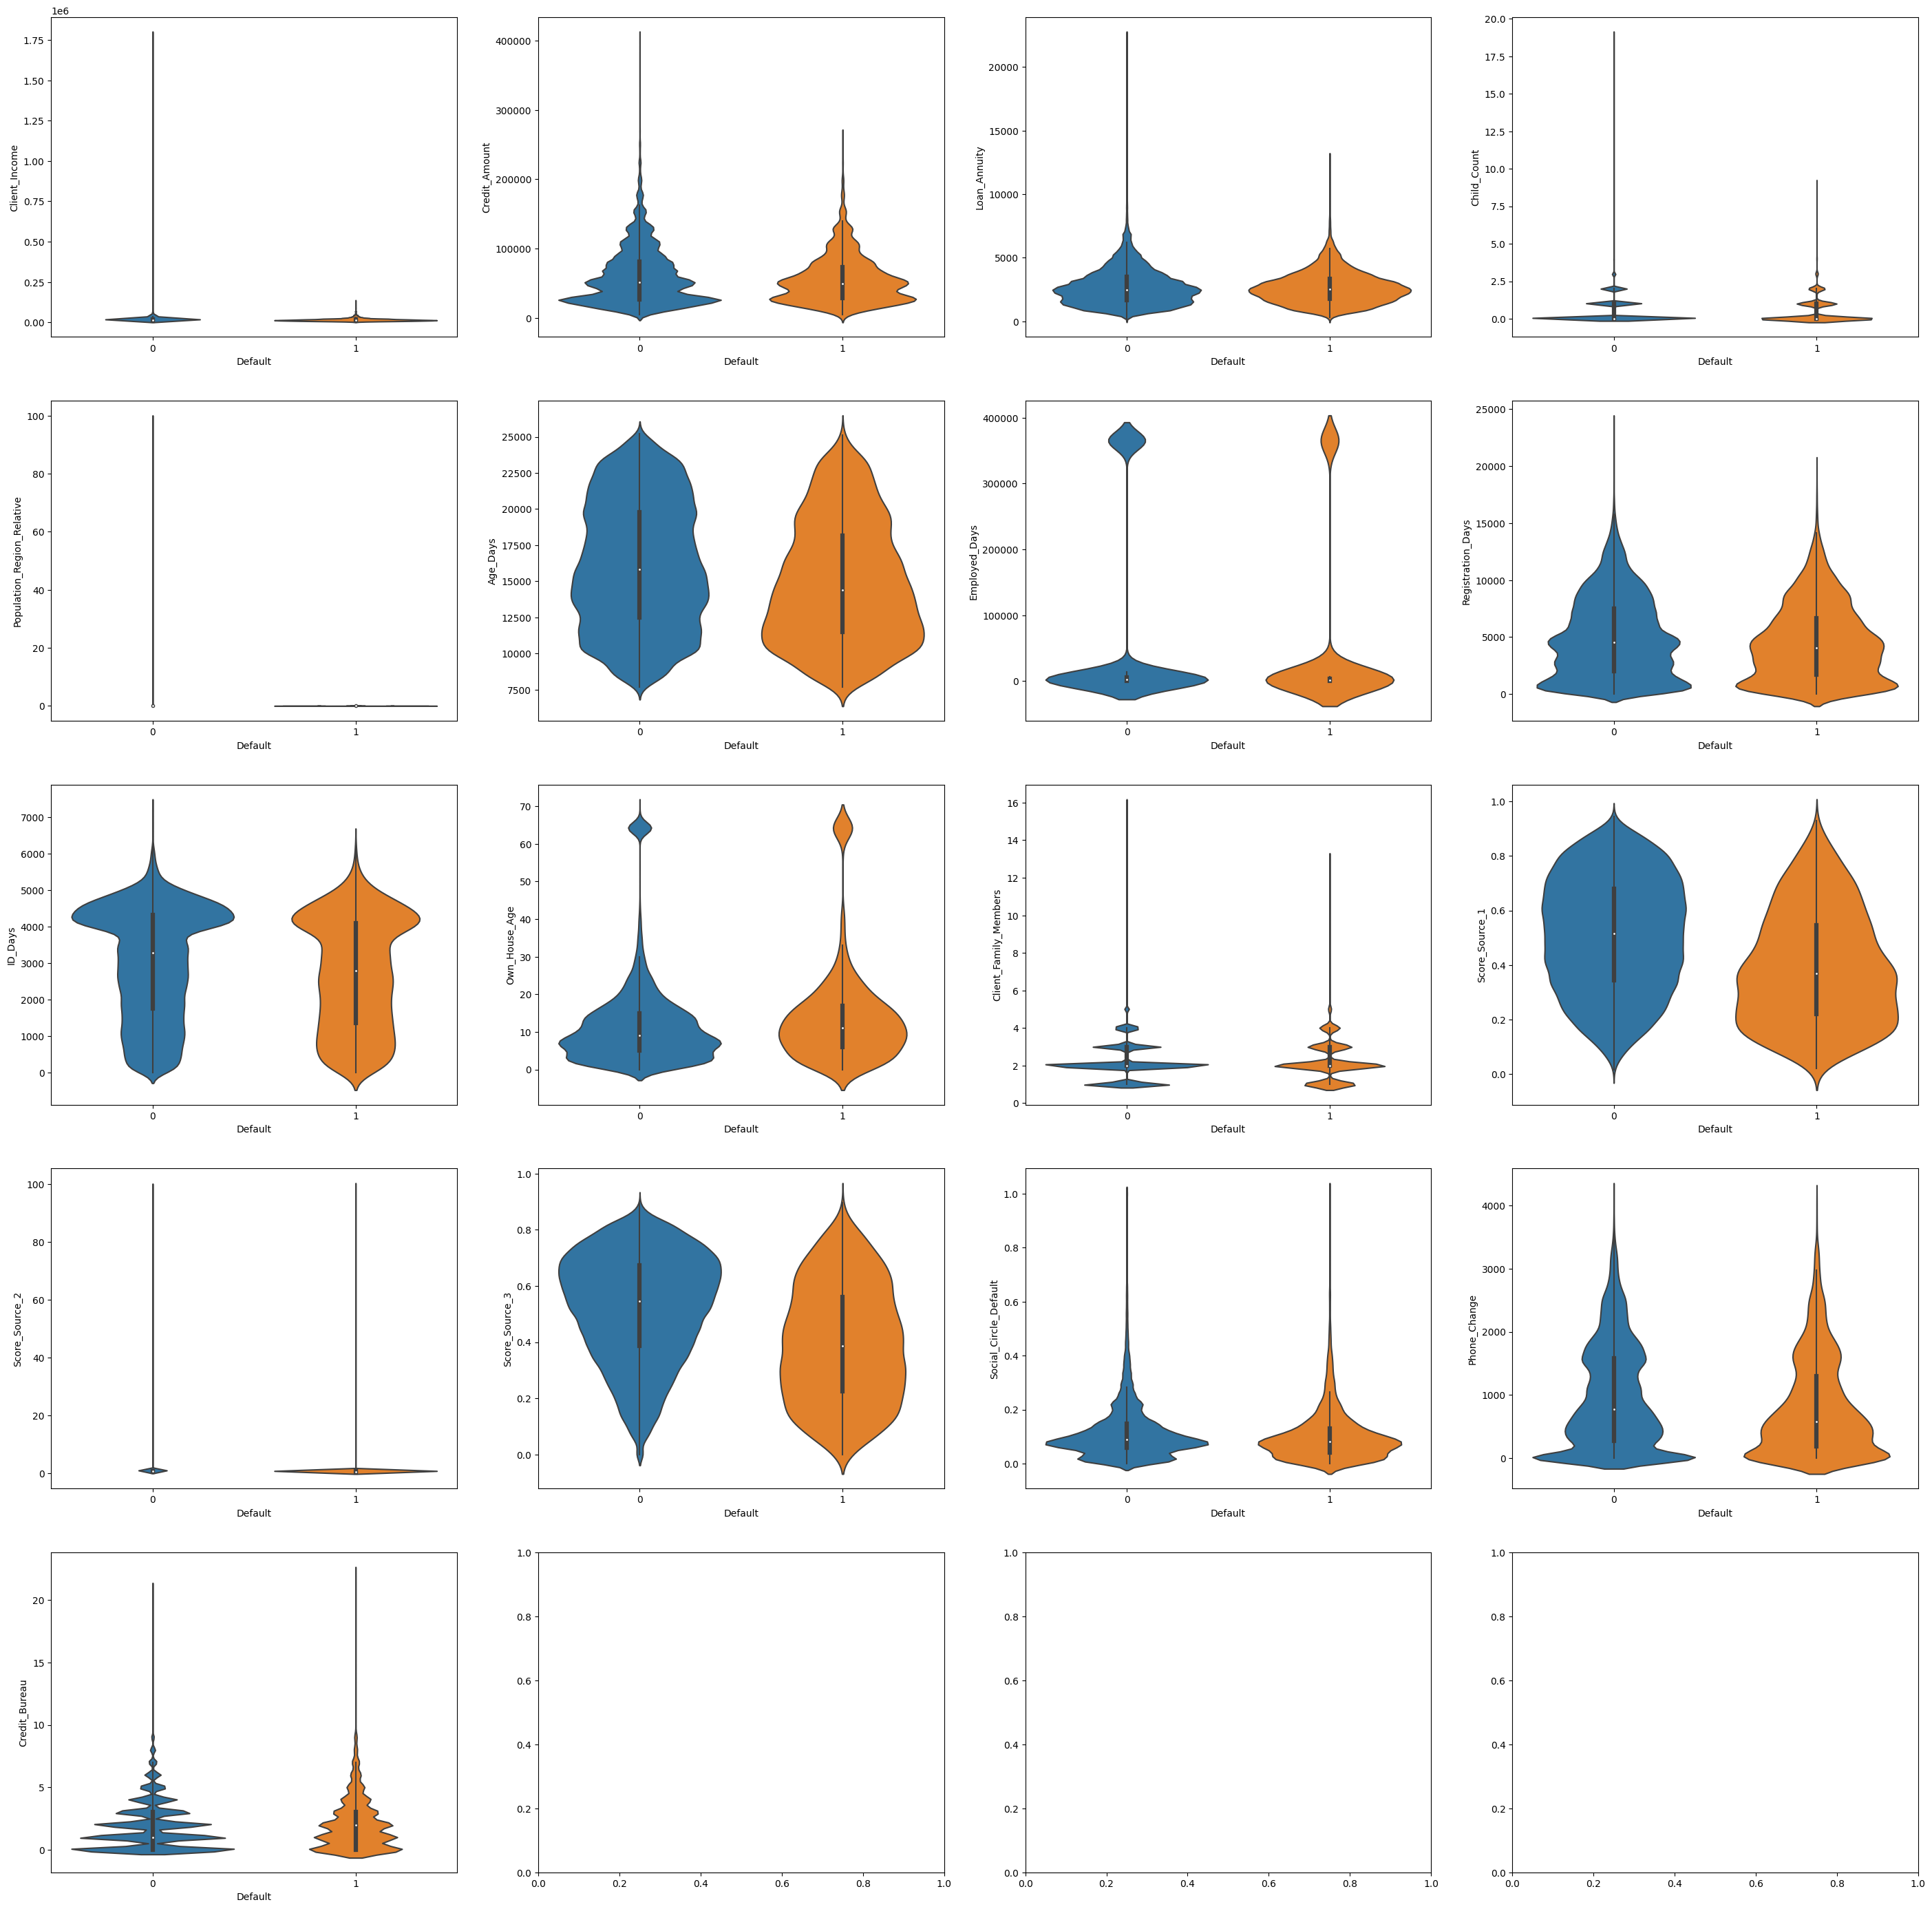

In [18]:
fig, axs = plt.subplots(5,4, figsize = (35,35))
i=0
for rows in axs:
    
    for ax in rows:
        if i >16 :
            break
        sns.violinplot(x='Default', y= numeri_datas_cols[i], data=data, ax=ax)
        i+=1     

In [19]:
data[data['Default']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9845 entries, 32 to 121851
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client_Income               9564 non-null   float64
 1   Car_Owned                   9562 non-null   float64
 2   Bike_Owned                  9512 non-null   float64
 3   Active_Loan                 9546 non-null   float64
 4   House_Own                   9531 non-null   float64
 5   Child_Count                 9550 non-null   float64
 6   Credit_Amount               9570 non-null   float64
 7   Loan_Annuity                9436 non-null   float64
 8   Accompany_Client            9720 non-null   object 
 9   Client_Income_Type          9546 non-null   object 
 10  Client_Education            9576 non-null   object 
 11  Client_Marital_Status       9571 non-null   object 
 12  Client_Gender               9649 non-null   object 
 13  Loan_Contract_Type          95

In [20]:
data.Score_Source_2[data.Score_Source_2 >= 0.9]

44468     100.0
73097     100.0
105522    100.0
109378    100.0
114099    100.0
119243    100.0
Name: Score_Source_2, dtype: float64

In [21]:
data.Score_Source_2 = data.Score_Source_2.apply(lambda x : 1 if x >=1 else x)

이상치 제거

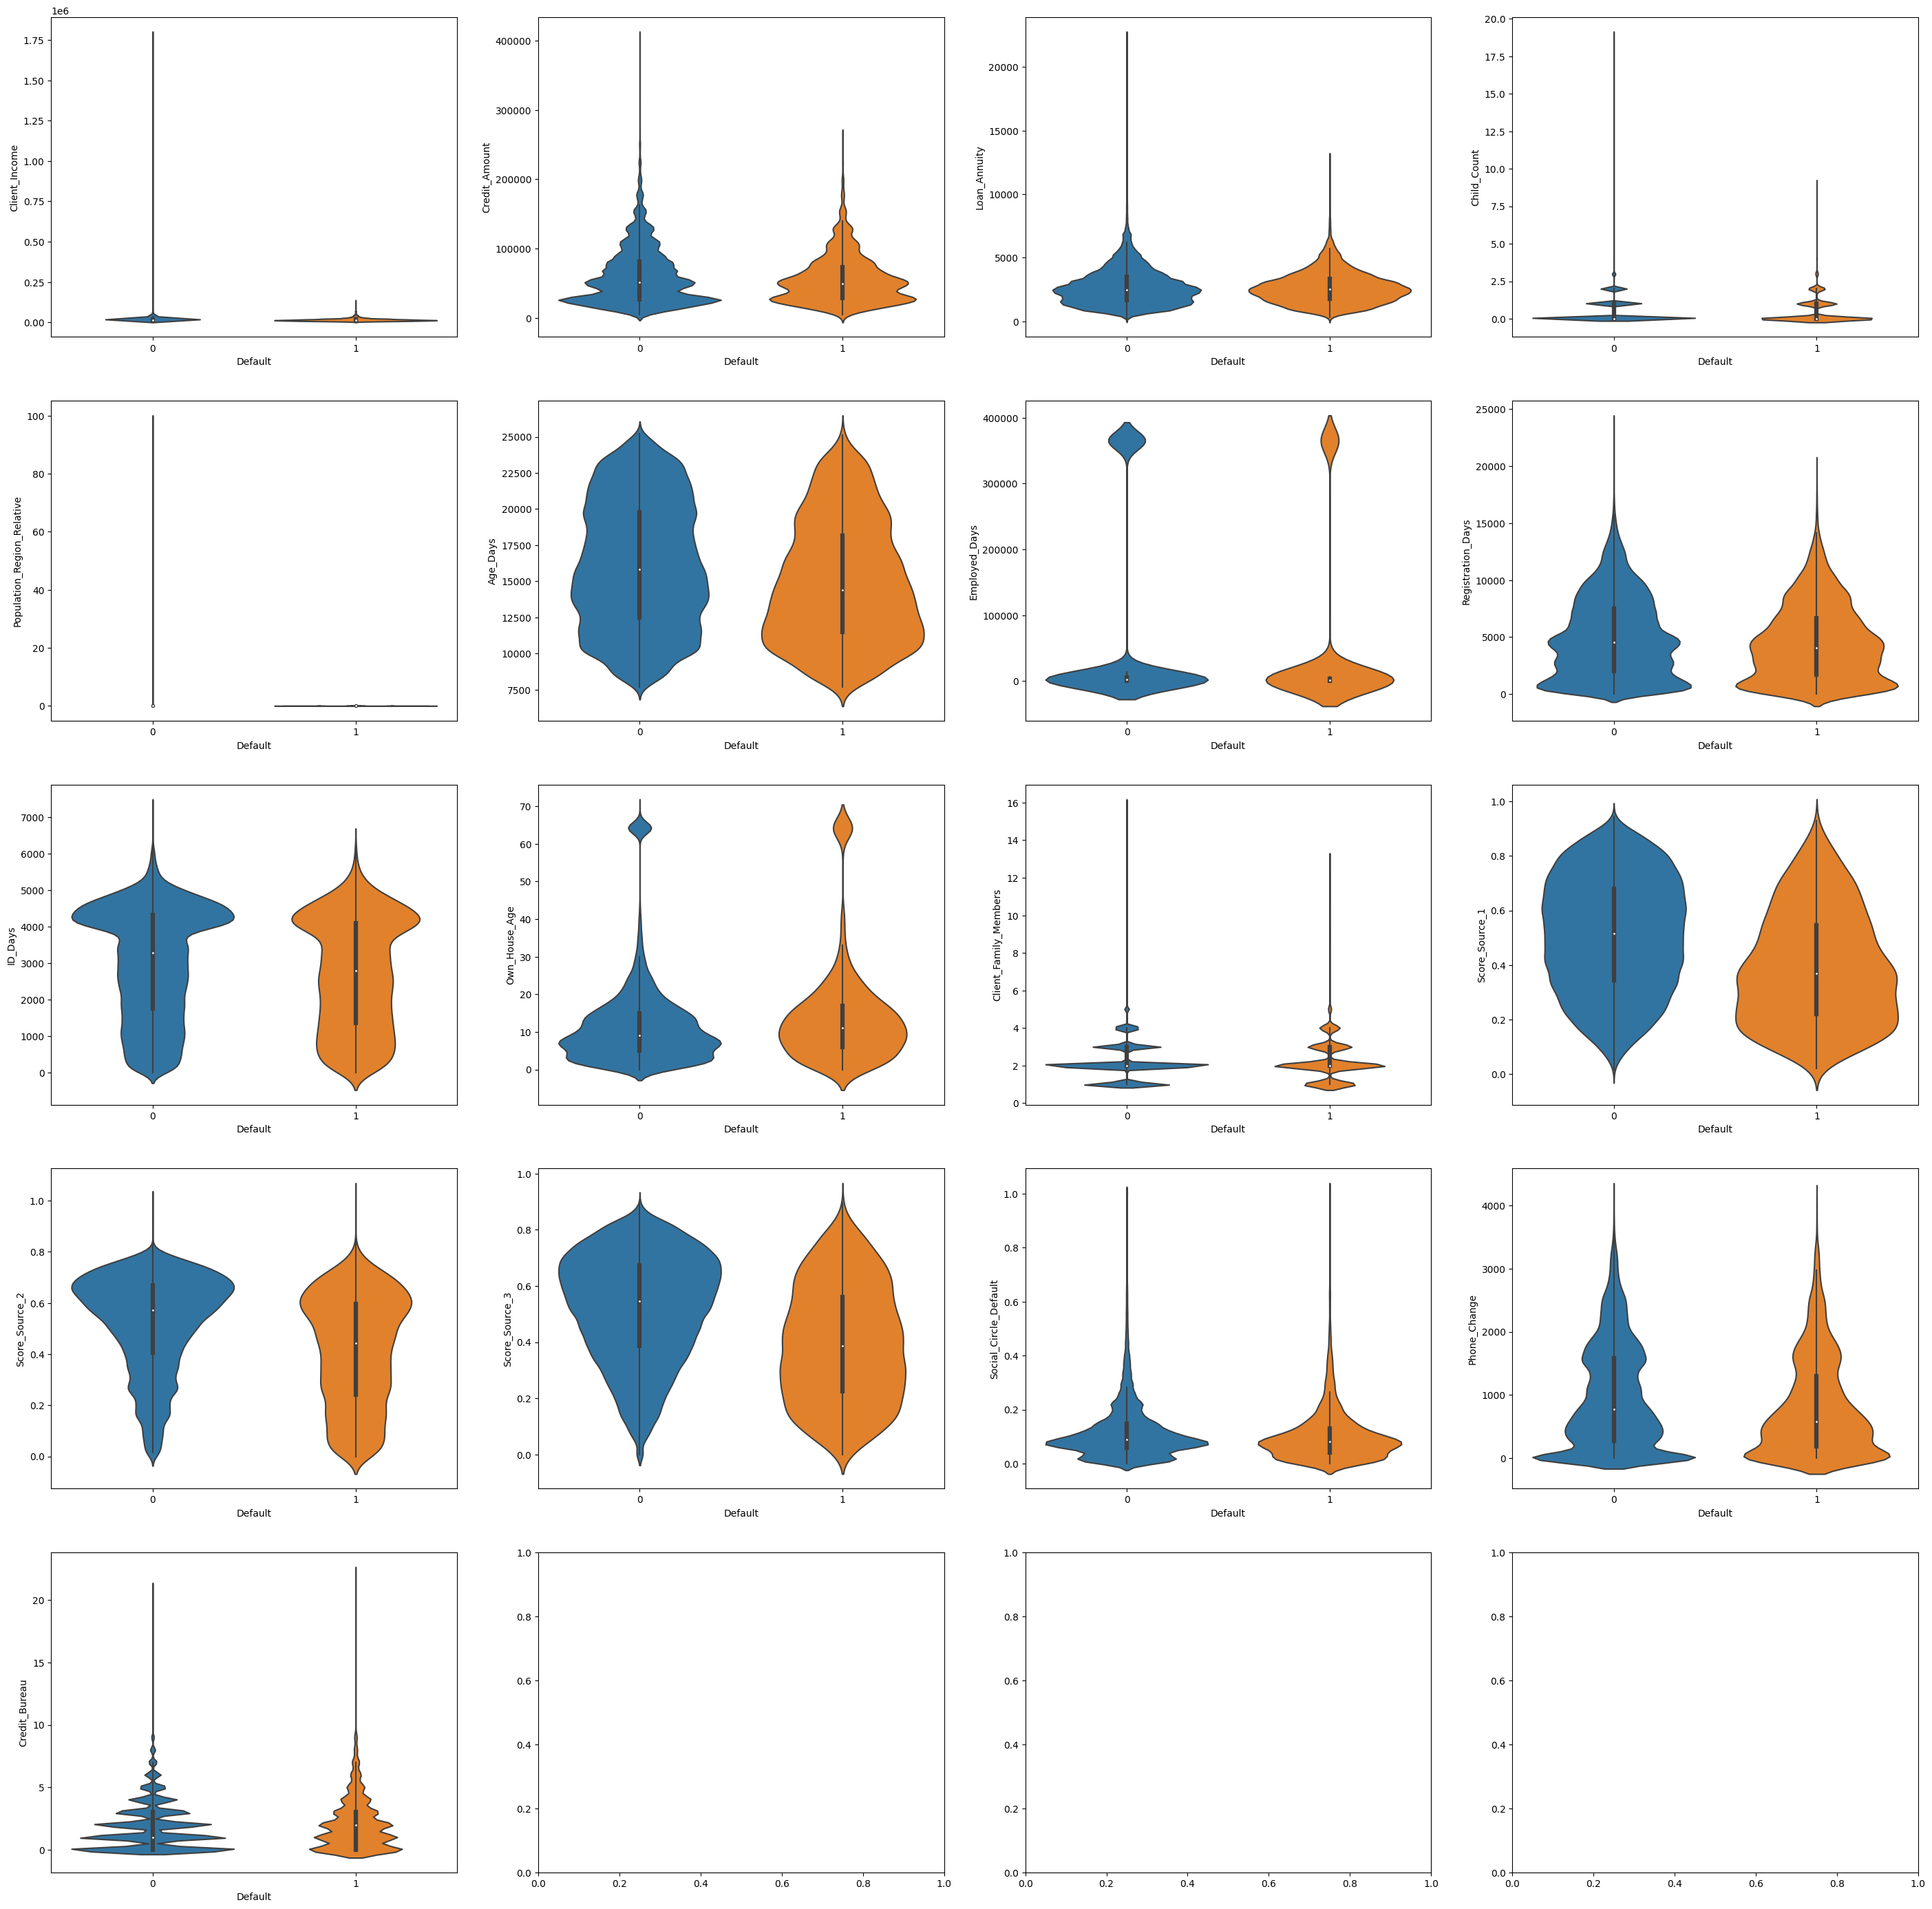

In [22]:
fig, axs = plt.subplots(5,4, figsize = (50,50))
i=0
for rows in axs:
    
    for ax in rows:
        if i >16 :
            break
        sns.violinplot(x='Default', y= numeri_datas_cols[i], data=data, ax=ax)
        i+=1     

In [23]:
score_sources = ['Score_Source_1','Score_Source_2','Score_Source_3']

In [27]:
fig, axs = plt.subplots(2,2, figsize = (35,35))
i=0
j=1
for rows in axs:
    for ax in rows:
        if i >1 :
            break
        sns.violinplot(x=score_sources[i],y=score_sources[j], hue='Default',data=data, ax=ax,split=True )
        j+=1
        if(j >2):
            i+=1
            j=i+1    

In [25]:
sns.violinplot(x=score_sources[0],y=score_sources[1], hue='Default',data=data, ax=ax,split=True )


<Axes: xlabel='Score_Source_1', ylabel='Score_Source_2'>